In [ ]:
# This notebook has dependencies on 'Numpy' and 'OpenCV'
# Open cmd terminal and run the following command to get them installed (passwd: prime)
# "sudo pip install numpy opencv-python"

In [1]:
import numpy as np
import cv2

In [1]:
# Opencv is a library that supports computer vision algorithms.
# Image segmentation is a problem that has a natural correspondence with Clustering
# We will look at the use of KMeans in segmenting images

In [ ]:
# You will have to upload the 3 images to google colab. We have uploaded files before. Check them for reference
# Step 1:
# Use the function cv2.imread() to read the original image. (Pick any of your favourite among the 3)

For Reference:
[Link](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html#read-an-image)

In [9]:
img = cv2.imread('home.jpg',0)
img

array([[ 88,  87,  85, ...,  86,  86,  86],
       [ 88,  87,  85, ...,  83,  84,  84],
       [ 87,  86,  85, ...,  80,  82,  83],
       ...,
       [109, 109, 109, ..., 176, 176, 176],
       [109, 109, 109, ..., 175, 175, 175],
       [109, 109, 109, ..., 174, 174, 174]], dtype=uint8)

In [11]:
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
img.shape

(384, 512)

In [13]:
img[0]

array([88, 87, 85, 84, 84, 85, 87, 88, 86, 86, 86, 86, 86, 86, 86, 86, 85,
       85, 85, 86, 86, 87, 87, 87, 87, 87, 87, 86, 86, 85, 85, 85, 87, 88,
       88, 88, 88, 87, 86, 85, 85, 85, 85, 85, 85, 85, 85, 85, 84, 84, 84,
       84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 85, 85, 85, 84,
       84, 83, 83, 83, 84, 84, 84, 83, 83, 82, 82, 82, 81, 81, 81, 81, 81,
       81, 81, 81, 83, 83, 83, 82, 82, 81, 81, 81, 79, 80, 80, 81, 81, 82,
       82, 83, 79, 79, 79, 79, 79, 79, 79, 79, 80, 80, 80, 79, 79, 79, 78,
       78, 79, 78, 78, 77, 77, 78, 78, 79, 77, 76, 76, 75, 75, 76, 76, 77,
       77, 76, 76, 75, 75, 76, 76, 77, 77, 76, 76, 75, 75, 76, 76, 77, 77,
       79, 80, 80, 78, 76, 77, 77, 78, 77, 76, 75, 75, 75, 75, 76, 76, 75,
       75, 74, 74, 75, 75, 76, 75, 75, 75, 74, 74, 73, 73, 73, 75, 75, 74,
       74, 74, 73, 73, 73, 74, 74, 74, 74, 74, 74, 74, 74, 76, 76, 76, 75,
       75, 74, 74, 74, 73, 73, 73, 73, 73, 73, 73, 73, 72, 72, 72, 72, 72,
       72, 72, 72, 74, 74

In [3]:
# Get Number of Channels
# Grayscale images have 1 dimension
# Color images have 3 (corresponding to RGB)
nchannels = img.ndim
nchannels

2

In [ ]:
# Grayscale and Color images are stored as [x_dim,y_dim,1], and [x_dim,y_dim,3] matrices respectively.
# A commonly used Computer Vision technique to reduce dimensions of image is to "vectorize" them.
# Meaning [x_dim,y_dim,1] ==> [new_dim,1]  : For Grayscale images
# Meaning [x_dim,y_dim,3] ==> [new_dim,3]  : For Color images
# How do we do this? Hint (We should "reshape" a numpy array)
# Why do we need this?

In [4]:
vec = img.reshape(img.shape[0] * img.shape[1],1)
vec

array([[ 88],
       [ 87],
       [ 85],
       ...,
       [174],
       [174],
       [174]], dtype=uint8)

In [34]:
vec.shape

(196608, 1)

In [5]:
Z = vec.copy()
Z = np.float32(Z)
Z.shape

(196608, 1)

In [41]:
# Now we have an image vector that can be processed by K-Means algorithm
# Study the cv2 documentation for using K-Means and feed in all the required parameters as its input
# Note that these parameters decide the quality of your segmentation.
# Most of ML is tuning these so-called "hyperparameters" and finding the best ones.
# Feel free to experiment on these parameters

In [6]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret, label, center = cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)


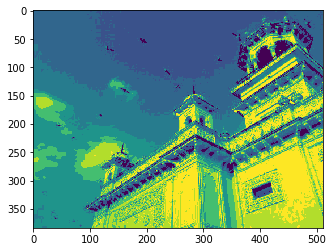

In [8]:
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(res2)

error: OpenCV(3.4.4) C:\bld\opencv_1545175842640\work\modules\core\src\kmeans.cpp:240: error: (-215:Assertion failed) data0.dims <= 2 && type == CV_32F && K > 0 in function 'cv::kmeans'


For Reference:
[Link](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html)

In [ ]:
# The output parameters are : Compactness, labels, and centers
# What do they mean? Would you desire more compactness? Is that always good?
# Experiment on different images and hyperparameters and check the quality of segmentation
# and try to analyze if compactness is a good measure of clustering

In [ ]:
# Remember cv2.imread() which we used to read an image,in Step 1
# Now use cv2.imshow() to show the image that was read in Step 1
# This is the original image

For Reference:
[Link](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_gui/py_image_display/py_image_display.html#display-an-image)

In [ ]:
# It is good practice to add the following two lines of code when using imshow()
# This makes the image display wait until ESC key is pressed
# So you can see the image and close it by hitting the ESC key whenever you need to
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Look at the labels array that is the output of K-Means
# This is an image vector denoting the cluster assigment of shape [new_dim,1]
# How can we transform this into a grayscale image?
# This is basically the inverse of "vectorize" operation we did at the start
# [new_dim,1] ==> [x_dim,y_dim,1]

In [ ]:
# Also note that image intensity is always between [0->255]
# We will have to scale the cluster assignment in label to this range
# Meaning, if the cluster assignment was [0,1,2], we should scale it to [0, 127, 255]

In [ ]:
# Now display this image
# This should be a grayscale image showing the labelling of K-Means

In [4]:
# Can we show the segmentation result as a color image instead of grayscale?
# One way to do this, is to assign the (RGB) intensity values of cluster centroids as the
# RGB intensity values of all pixels belonging to that cluster.
# Is this always a good way? Think of KMeans convergence and what if the centroids had same color
# Lets anyway stick to this approach
# To do this, you have to do the following:
# For example, consider we have 3 clusters with centroids c0,c1,c2
# Now look at all the pixels of the labels image (which stores the cluster assignment -> 0,1,2)
# All pixels with label 0, need to have intensity of c0, and so on for 1 and 2.

In [ ]:
# Display this color image showing segmentation results

In [ ]:
# Now try the other images available, and also see if the same hyperparameter settings do justice to them as well
# You can repeat by simply re-running this notebook with new image file and hyperparameters